In [4]:
# 1. Import the libraries
import pandas as pd
from pandas_profiling import ProfileReport
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [6]:
# 2. Reading the data
df=pd.read_csv("Facebook_Ads_2.csv", encoding='ISO-8859-1')

In [7]:
# 3. Understanding the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   emails              499 non-null    object 
 2   Country             499 non-null    object 
 3   Time Spent on Site  499 non-null    float64
 4   Salary              499 non-null    float64
 5   Clicked             499 non-null    int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 23.5+ KB


In [8]:
df.describe()

,Time Spent on Site,Salary,Clicked
count,499.000000,499.000000,499.000000
mean,32.920178,52896.992469,0.501002
std,9.103455,18989.183150,0.500501
min,5.000000,20.000000,0.000000
25%,26.425044,38888.117260,0.000000
50%,33.196067,52840.913110,1.000000
75%,39.114995,65837.288190,1.000000
max,60.000000,100000.000000,1.000000


In [9]:
report=ProfileReport(df)

In [10]:
report.to_file(output_file='fc.html')

In [11]:
# 4. Visualization
click=df[df['Clicked']==1]

In [12]:
no_click=df[df['Clicked']==0]

In [13]:
print('Total number of records:', len(df), '\nTotal number of Clicked:', len(click))

Total number of records: 499 
Total number of Clicked: 250


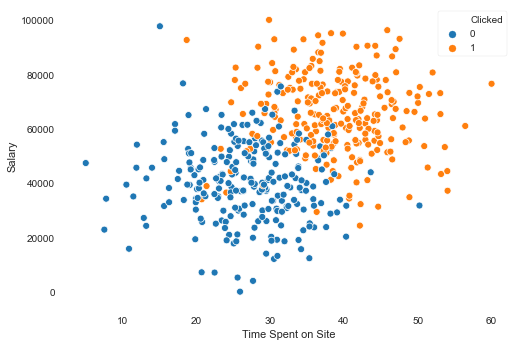

In [14]:
sns.scatterplot(df['Time Spent on Site'], df['Salary'], hue=df['Clicked'], data=df)

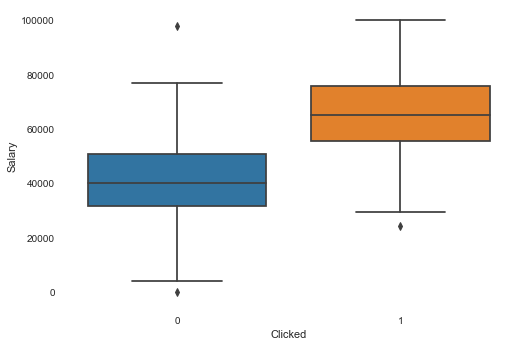

In [16]:
sns.boxplot(x='Clicked',y='Salary', data=df)

In [17]:
# 5. Test Train Split
df.drop(['Names','emails','Country'], axis=1, inplace=True)

In [18]:
X=df.drop(['Clicked'], axis=1).values

In [19]:
y=df['Clicked'].values

In [20]:
sc=StandardScaler()

In [21]:
X=sc.fit_transform(X)

In [22]:
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [23]:
log_reg=LogisticRegression(fit_intercept=True, random_state=0)

In [24]:
log_reg.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [25]:
print(f'Logistic Coeff: {log_reg.coef_}')
print(f'Logistic constant: {log_reg.intercept_}')

Logistic Coeff: [[2.20937952 2.05358008]]
Logistic constant: [0.09380809]


In [26]:
# Testing the model
y_predict=log_reg.predict(X_test)

In [27]:
y_predict_train=log_reg.predict(X_train)

In [29]:
cm_train=confusion_matrix(y_train,y_predict_train)
cm_train

array([[168,  20],
       [ 17, 194]], dtype=int64)

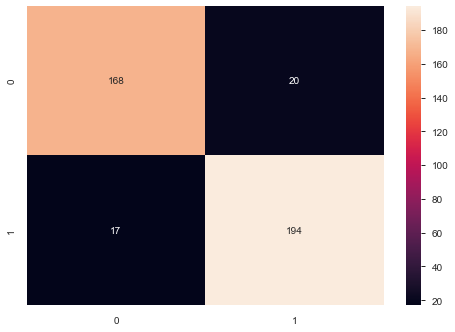

In [32]:
sns.heatmap(cm_train, annot=True, fmt='d')

In [34]:
cm=confusion_matrix(y_test, y_predict)
cm

array([[54,  7],
       [ 1, 38]], dtype=int64)

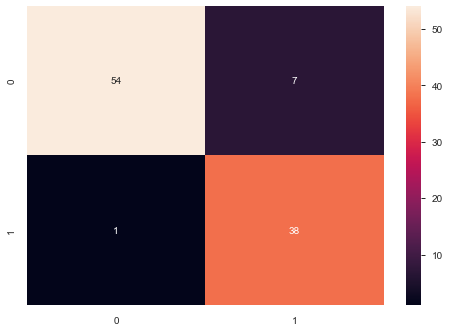

In [35]:
sns.heatmap(cm, annot=True, fmt='d')

In [36]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.98      0.89      0.93        61
           1       0.84      0.97      0.90        39

    accuracy                           0.92       100
   macro avg       0.91      0.93      0.92       100
weighted avg       0.93      0.92      0.92       100



In [37]:
X_set, y_set= X_test, y_test
X1, X2= np.meshgrid(np.arange(start=X_set[:, 0].min() -1, stop=X_set[:,0].max()+1, step=0.01),
                   np.arange(start=X_set[:, 1].min() -1, stop=X_set[:,1].max()+1, step=0.01))

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


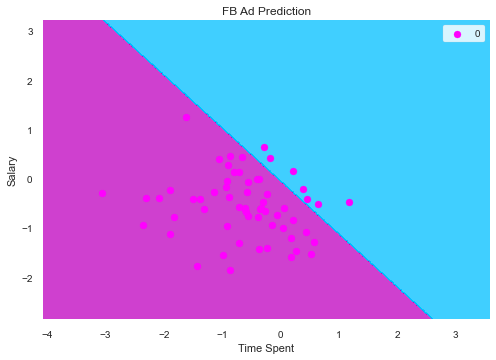

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


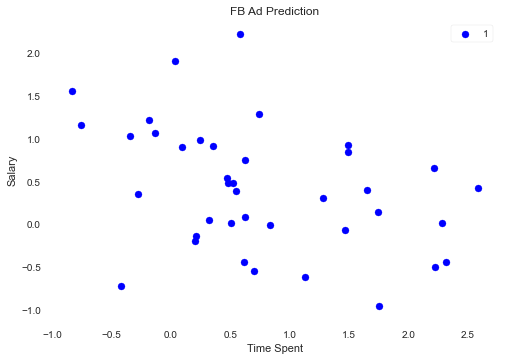

In [40]:
plt.contourf(X1,X2,log_reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
           alpha=0.75, cmap=ListedColormap(('m','deepskyblue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set==j,0], X_set[y_set==j,1],
               c=ListedColormap(('magenta','blue'))(i),label=j)
    plt.title('FB Ad Prediction')
    plt.xlabel('Time Spent')
    plt.ylabel('Salary')
    plt.legend()
    plt.show()